In [1]:
'''enlace: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction'''



'enlace: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction'

# IMPORTATIONS AND DATASETS

In [2]:



import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


/opt/homebrew/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/homebrew/lib/python3.11/site-packages/visions/backends/shared/nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [3]:

train_df= pd.read_csv("train.csv")
test_df= pd.read_csv("test.csv")

In [4]:
'''profile = ProfileReport(train_df, title="Profiling Report")
profile.to_notebook_iframe()
profile.to_file("your_report.html")'''


'profile = ProfileReport(train_df, title="Profiling Report")\nprofile.to_notebook_iframe()\nprofile.to_file("your_report.html")'

# EDA

In [5]:

train_df.shape
train_df.info()
train_df.dtypes
train_df.describe()
train_df.columns
train_df.nunique()
train_df.isna().sum()
train_df['satisfaction']. value_counts()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
train_df.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [7]:

column_to_drop=['Unnamed: 0', 'id']
train_df = train_df.drop(column_to_drop, axis=1)

# Data cleaning

In [8]:
# fill na with mean
train_df['Arrival Delay in Minutes'] = train_df['Arrival Delay in Minutes'].astype(float).fillna(train_df['Arrival Delay in Minutes'].mean())


# Visualizations 

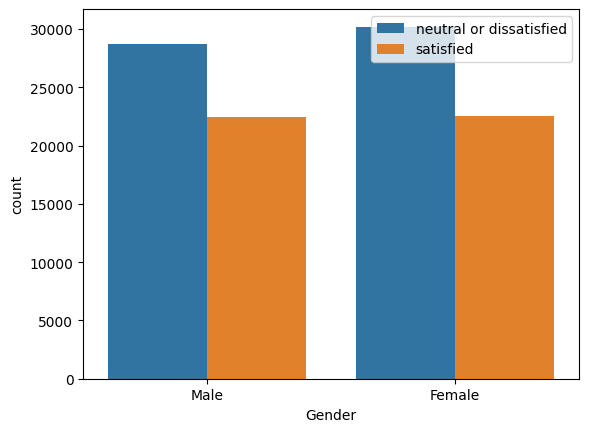

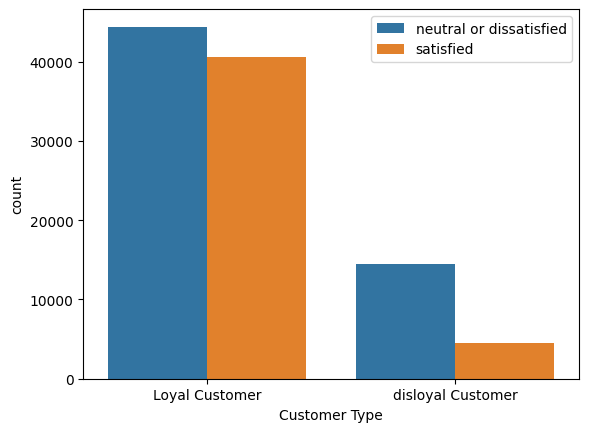

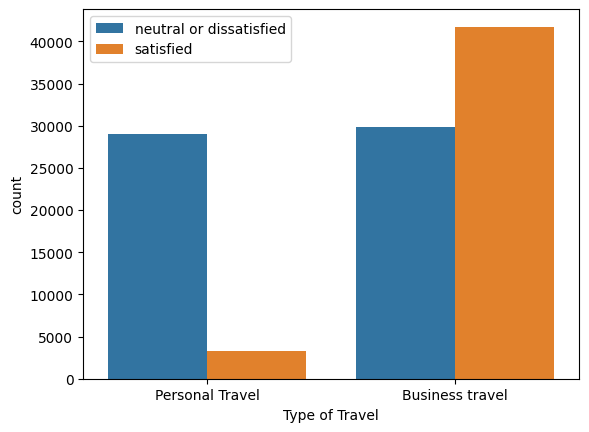

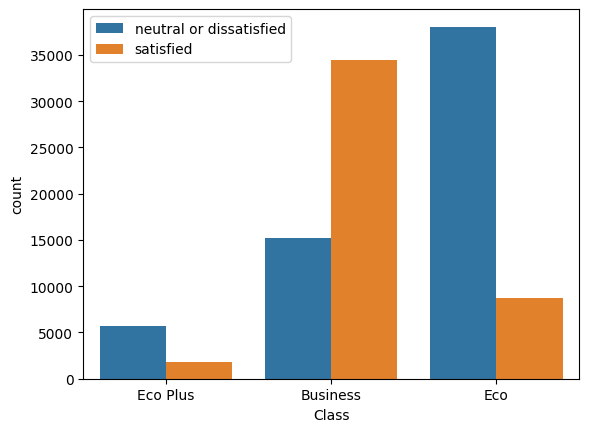

In [9]:
#Visualization of categorical variables
label_data = ["Gender", "Customer Type", "Type of Travel", "Class"]
for column in label_data:
    sns.countplot(data=train_df, x=column, hue='satisfaction')
    plt.legend()
    plt.show()

# One-hot-encoding - categorical variables

In [10]:
df_categorical = train_df[label_data]
encoder = OneHotEncoder()
encoded_categorical = encoder.fit_transform(df_categorical)
feature_names = encoder.get_feature_names_out(label_data)
encoded_df = pd.DataFrame(encoded_categorical.toarray(), columns=feature_names)
df_encoded = pd.concat([train_df.drop(label_data, axis=1), encoded_df], axis=1)


In [11]:
#target column
df_encoded.loc[df_encoded["satisfaction"] == "neutral or dissatisfied"] = 0
df_encoded.loc[df_encoded["satisfaction"] != 0, "satisfaction"] = 1


# Correlation matrix

/var/folders/bd/40zqj6cj2170f4bjkj40r7kc0000gn/T/ipykernel_2334/683148914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_encoded.corr()


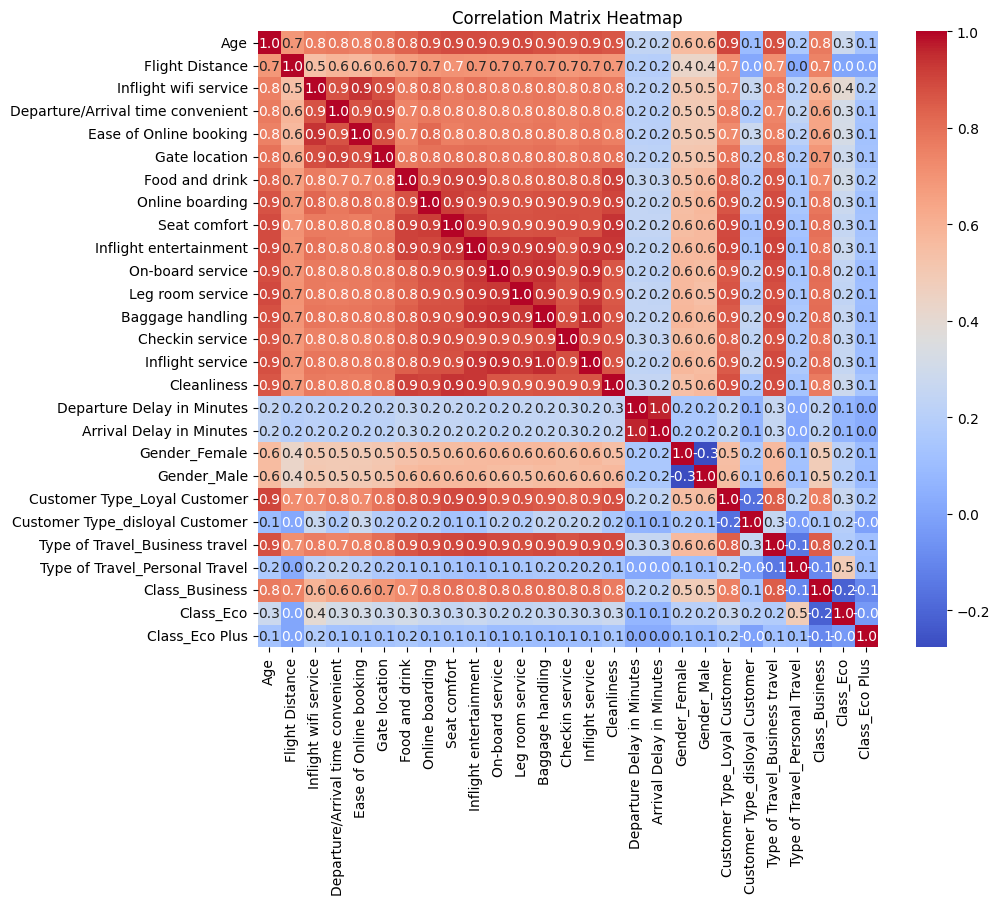

In [12]:
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Data splitting

In [13]:
X =df_encoded.drop('satisfaction', axis=1)  
y= df_encoded['satisfaction']
# Fit the scaler to the data and transform X
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=None)

#Transformation into tensors
X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)


# MODEL BUILDING

In [15]:
input_shape = X_train.shape[1]



In [16]:
model = Sequential()
model.add(Dense(30, activation='relu', input_shape=(input_shape,)))  # Input layer
model.add(Dense(30, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                840       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1801 (7.04 KB)
Trainable params: 1801 (7.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


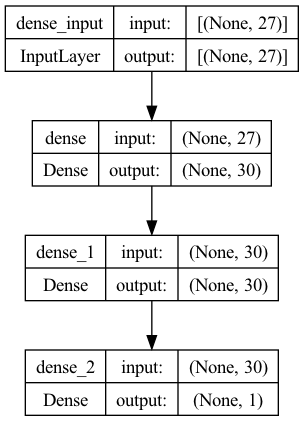

In [17]:
tf.keras.utils.plot_model(model, to_file = "model.png", show_shapes=True)

In [18]:
# Train the model
history= model.fit(X_train_tensor, y_train_tensor, epochs=20, batch_size=100, validation_split=0.2)

Epoch 1/20
665/665 [==============================] - 1s 643us/step - loss: 0.0292 - accuracy: 0.9932 - val_loss: 2.5869e-04 - val_accuracy: 1.0000
Epoch 2/20
665/665 [==============================] - 0s 527us/step - loss: 1.2596e-04 - accuracy: 1.0000 - val_loss: 6.1636e-05 - val_accuracy: 1.0000
Epoch 3/20
665/665 [==============================] - 0s 528us/step - loss: 3.8715e-05 - accuracy: 1.0000 - val_loss: 2.5631e-05 - val_accuracy: 1.0000
Epoch 4/20
665/665 [==============================] - 0s 526us/step - loss: 1.7505e-05 - accuracy: 1.0000 - val_loss: 1.3075e-05 - val_accuracy: 1.0000
Epoch 5/20
665/665 [==============================] - 0s 548us/step - loss: 9.3149e-06 - accuracy: 1.0000 - val_loss: 7.4614e-06 - val_accuracy: 1.0000
Epoch 6/20
665/665 [==============================] - 0s 550us/step - loss: 5.4123e-06 - accuracy: 1.0000 - val_loss: 4.5387e-06 - val_accuracy: 1.0000
Epoch 7/20
665/665 [==============================] - 0s 596us/step - loss: 3.3126e-06 - acc

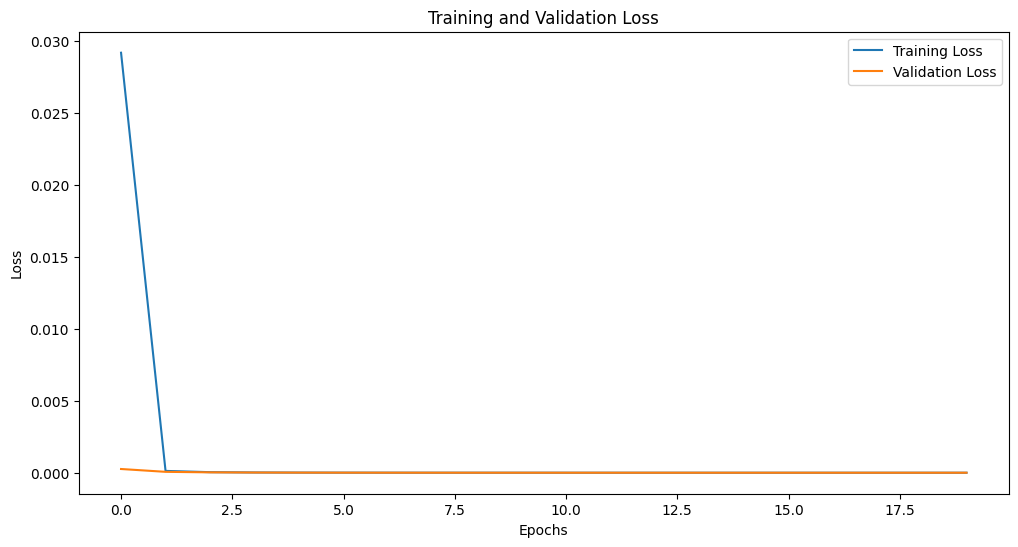

In [19]:

# Access the training history
loss = history.history['loss']
accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

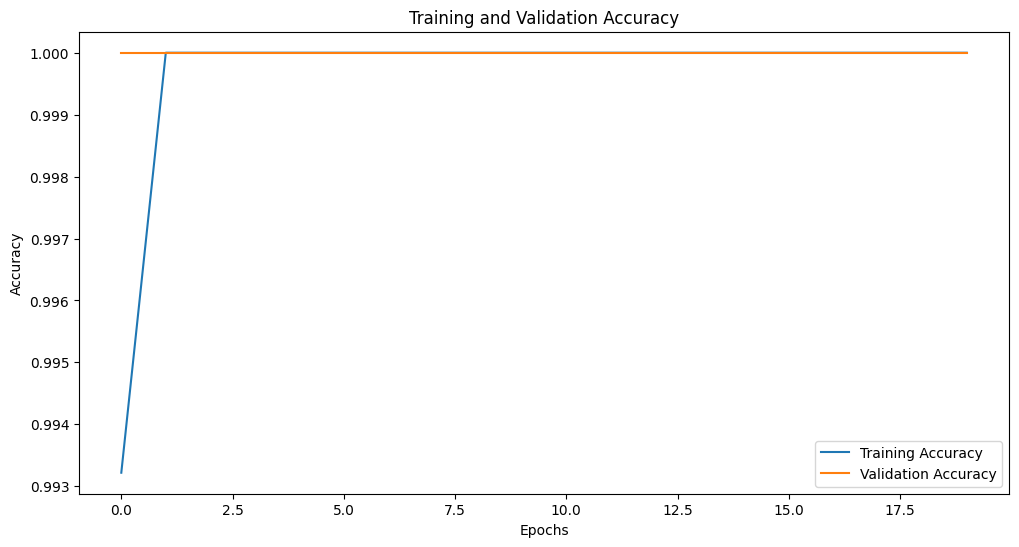

In [20]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [21]:
# PREDICTIONS
predictions= model.predict(X_test_tensor)
binary_predictions = [1 if p >= 0.5 else 0 for p in predictions]

650/650 [==============================] - 0s 264us/step


In [22]:
# SCORES
accuracy = accuracy_score(y_test_tensor, binary_predictions)
precision = precision_score(y_test_tensor, binary_predictions)
recall = recall_score(y_test_tensor, binary_predictions)
f1 = f1_score(y_test_tensor, binary_predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
